# Classification of Images from the CIFAR-10 Dataset using CNN.

The CIFAR-10 dataset consists of color 60,000 images each with 32 x 32 pixel in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

* Class labels are: 

airplane : 0,
automobile : 1,
bird : 2,
cat : 3,
deer : 4,
dog : 5,
frog : 6,
horse : 7,
ship : 8,
truck : 9.

In [1]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import ResNet50
from keras.datasets import cifar10
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt

## Load data.

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Show some sample images of data set with corresponding labels.

Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


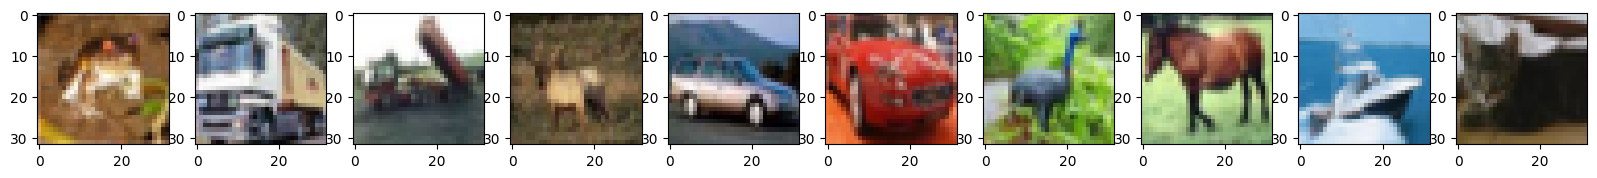

In [3]:
import matplotlib.pyplot as plt
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Preparing the dataset

1) Normalize the input data

In [5]:
X_train = x_train / 255
X_test = x_test / 255

2) One-hot encoding using keras for labels

In [7]:
from tensorflow.keras.utils import to_categorical

num_classes =10
#Y_train = np_utils.to_categorical(y_train,num_classes =10)
#Y_test = np_utils.to_categorical(y_test, num_classes= 10)
Y_train = to_categorical(y_train,num_classes =10)
Y_test = to_categorical(y_test, num_classes= 10)

In [8]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(x_train)

In [9]:
# Compute class weights
class_weights = compute_class_weight(
    'balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1)
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [10]:
print("Train data shapes")
print(X_train.shape)
print(Y_train.shape)
print("Test data shapes")
print(X_test.shape)
print(Y_test.shape)

Train data shapes
(50000, 32, 32, 3)
(50000, 10)
Test data shapes
(10000, 32, 32, 3)
(10000, 10)


# Build a CNN model to classify CIFAR -10 images.

In [11]:
model = Sequential()
# Add 2 convolutional layers
model.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size = (3,3), strides=(1,1), padding='same', activation= 'relu'))
# Add maxpool layer
model.add(MaxPool2D(pool_size= (2,2)))

# Add flatten layer
model.add(Flatten())
# Add Dense layers for hidden and output

model.add(Dense(256, activation= 'relu'))
model.add(Dense(num_classes,activation= 'softmax'))

C:\Users\haree\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Have a look at the summary of constructed CNN model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,110,122 (8.05 MB)

 Trainable params: 2,110,122 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# compile the model
model.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')

In [14]:
# Train the CNN model
Info = model.fit(X_train, Y_train, batch_size= 128, epochs= 11, verbose=2, validation_split= 0.2)

Epoch 1/11
313/313 - 29s - 91ms/step - accuracy: 0.4499 - loss: 1.5352 - val_accuracy: 0.5473 - val_loss: 1.2857
Epoch 2/11
313/313 - 22s - 72ms/step - accuracy: 0.6052 - loss: 1.1254 - val_accuracy: 0.6307 - val_loss: 1.0595
Epoch 3/11
313/313 - 22s - 69ms/step - accuracy: 0.6741 - loss: 0.9331 - val_accuracy: 0.6617 - val_loss: 0.9707
Epoch 4/11
313/313 - 22s - 69ms/step - accuracy: 0.7223 - loss: 0.8021 - val_accuracy: 0.6638 - val_loss: 0.9789
Epoch 5/11
313/313 - 22s - 69ms/step - accuracy: 0.7608 - loss: 0.6879 - val_accuracy: 0.6743 - val_loss: 0.9856
Epoch 6/11
313/313 - 22s - 69ms/step - accuracy: 0.8027 - loss: 0.5776 - val_accuracy: 0.6745 - val_loss: 0.9847
Epoch 7/11
313/313 - 22s - 70ms/step - accuracy: 0.8377 - loss: 0.4732 - val_accuracy: 0.6816 - val_loss: 1.0273
Epoch 8/11
313/313 - 21s - 69ms/step - accuracy: 0.8763 - loss: 0.3665 - val_accuracy: 0.6791 - val_loss: 1.0753
Epoch 9/11
313/313 - 21s - 69ms/step - accuracy: 0.9087 - loss: 0.2776 - val_accuracy: 0.6760 - 

With the below simple function we will be able to plot our training history.

In [15]:
model.save("cifar10_resnet50_improved.h5")

In [16]:
def plotLosses(Info):  
    plt.plot(Info.history['loss'])
    plt.plot(Info.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

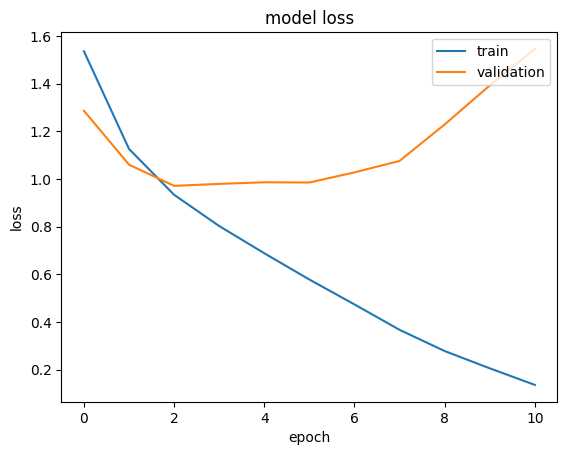

In [17]:
plotLosses(Info)

By the above loss plot, 
* the training loss is decreasing and,
* the validation loss decreased for some epochs and then it increased.
It is called as overfitting. 
* To fix this we need to Regularize our model by adding Dropouts to our CNN model. Let's do it and observe the changes.

# Regularization

Lets build the CNN model with dropouts

In [18]:
model= Sequential()
# Add 2 convolution layers
model.add(Conv2D(32,kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# Add Dropaut Layer
model.add(Dropout(0.25))

# Add flatten layer
model.add(Flatten())
# Add Dense layers for hidden and output

model.add(Dense(256, activation= 'relu'))
model.add(Dense(num_classes,activation= 'softmax'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,110,122 (8.05 MB)

 Trainable params: 2,110,122 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')

We will store the training loss values and metrics in a Info object, so we can visualize the training process later.

In [21]:
# Train the CNN model
Info = model.fit(X_train, Y_train, batch_size= 128, epochs= 9, verbose=2, validation_split= 0.2)

Epoch 1/9
313/313 - 28s - 88ms/step - accuracy: 0.4309 - loss: 1.5946 - val_accuracy: 0.5526 - val_loss: 1.2873
Epoch 2/9
313/313 - 23s - 74ms/step - accuracy: 0.5769 - loss: 1.1979 - val_accuracy: 0.5979 - val_loss: 1.1520
Epoch 3/9
313/313 - 23s - 73ms/step - accuracy: 0.6345 - loss: 1.0438 - val_accuracy: 0.6328 - val_loss: 1.0546
Epoch 4/9
313/313 - 23s - 73ms/step - accuracy: 0.6806 - loss: 0.9106 - val_accuracy: 0.6537 - val_loss: 0.9899
Epoch 5/9
313/313 - 23s - 73ms/step - accuracy: 0.7132 - loss: 0.8123 - val_accuracy: 0.6613 - val_loss: 0.9705
Epoch 6/9
313/313 - 23s - 73ms/step - accuracy: 0.7494 - loss: 0.7171 - val_accuracy: 0.6771 - val_loss: 0.9589
Epoch 7/9
313/313 - 23s - 74ms/step - accuracy: 0.7798 - loss: 0.6306 - val_accuracy: 0.6781 - val_loss: 0.9550
Epoch 8/9
313/313 - 23s - 73ms/step - accuracy: 0.8073 - loss: 0.5498 - val_accuracy: 0.6794 - val_loss: 0.9930
Epoch 9/9
313/313 - 23s - 73ms/step - accuracy: 0.8341 - loss: 0.4746 - val_accuracy: 0.6717 - val_loss:

In [22]:
model.save("modell.h5")
print("Model saved as modell.h5")


Model saved as modell.h5


In [23]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("modell.h5")
model.summary()  # Display model architecture


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,110,124 (8.05 MB)

 Trainable params: 2,110,122 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

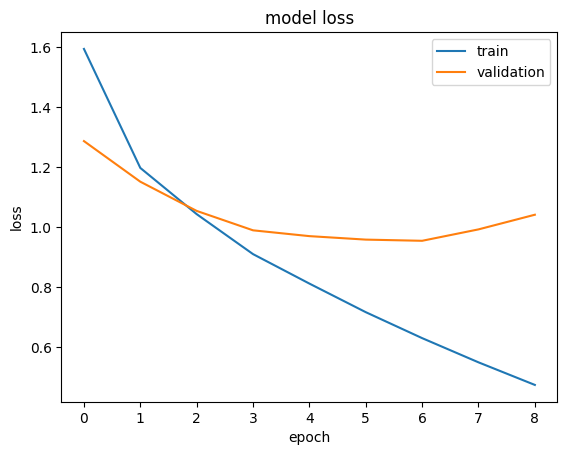

In [24]:
plotLosses(Info)

Compare with the CNN model with out dropout layer, current model is somewhat better. BUt still lot more can be to improved to get better results.

**Evaluating the our CNN model**

In [25]:
score = model.evaluate(X_test, Y_test, batch_size=128, verbose=0)

In [26]:
print(model.metrics_names)
print(score)

['loss', 'compile_metrics']
[1.069253921508789, 0.6607000231742859]


In [27]:
# Evaluate the model
score = model.evaluate(X_test, Y_test, batch_size=128, verbose=0)

# Display metric names and scores
print(f"Metrics: {model.metrics_names}")
print(f"Loss: {score[0]:.4f}, Accuracy: {score[1]:.4f}")


Metrics: ['loss', 'compile_metrics']
Loss: 1.0693, Accuracy: 0.6607


# The END






